# Proyek Machine Learning : Predictive Analytics

* Domain : Pendidikan
* Tujuan : Melakukan prediksi performa siswa di pendidikan menengah di dua sekolah Portugis
* Dataset yang digunakan : https://archive.ics.uci.edu/dataset/320/student+performance



### Install *package* ucimlrepo

In [ ]:
!pip install ucimlrepo

### Import Library yang diperlukan

In [ ]:
from ucimlrepo import fetch_ucirepo

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import pickle
import pydotplus

from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    LogisticRegression,
    SGDClassifier,
    BayesianRidge,
)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from six import StringIO
from IPython.display import Image
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    BaggingClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.svm import LinearSVC
from numpy.ma.core import sqrt
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from numpy.polynomial.polynomial import polyfit
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    confusion_matrix
)
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## DATA UNDERSTANDING

### Load Dataset

In [ ]:
# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

Kode di atas digunakan untuk memuat dataset ke dalam dua variabel X dan y, dimana X digunakan untuk data pelatihan model (variabel independen), dan y adalah nilai yang akan diprediksi oleh model berdasarkan X (variabel dependen atau label)

### Melihat ukuran Dataframe

In [ ]:
print(X.shape)
print(y.shape)

(649, 30)
(649, 3)


Kita perlu menggabungkan variabel X (Independen) dengan varibel y (Label), tapi sebelum itu kita lihat terlebih dahulu ukuran dari data tersebut. Total data baik varibel X dan y berjumlah 649, sehingga dapat kita gabungkan dengan aman

### Gabungkan Dataframe Fitur dan Target

In [ ]:
df = pd.concat([X, y], axis=1)

# Exploratory Data Analysis-Deskripsi Variabel

### Menampilkan tipe data setiap kolom pada dataset "df"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

## Deskripsi Variabel Numerik

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


### Melakukan pemeriksaan terhadap nilai yang hilang(missing value) pada dataset

In [ ]:
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


### Memvisualisasikan data menggunakan boxplot untuk fitur numerik:

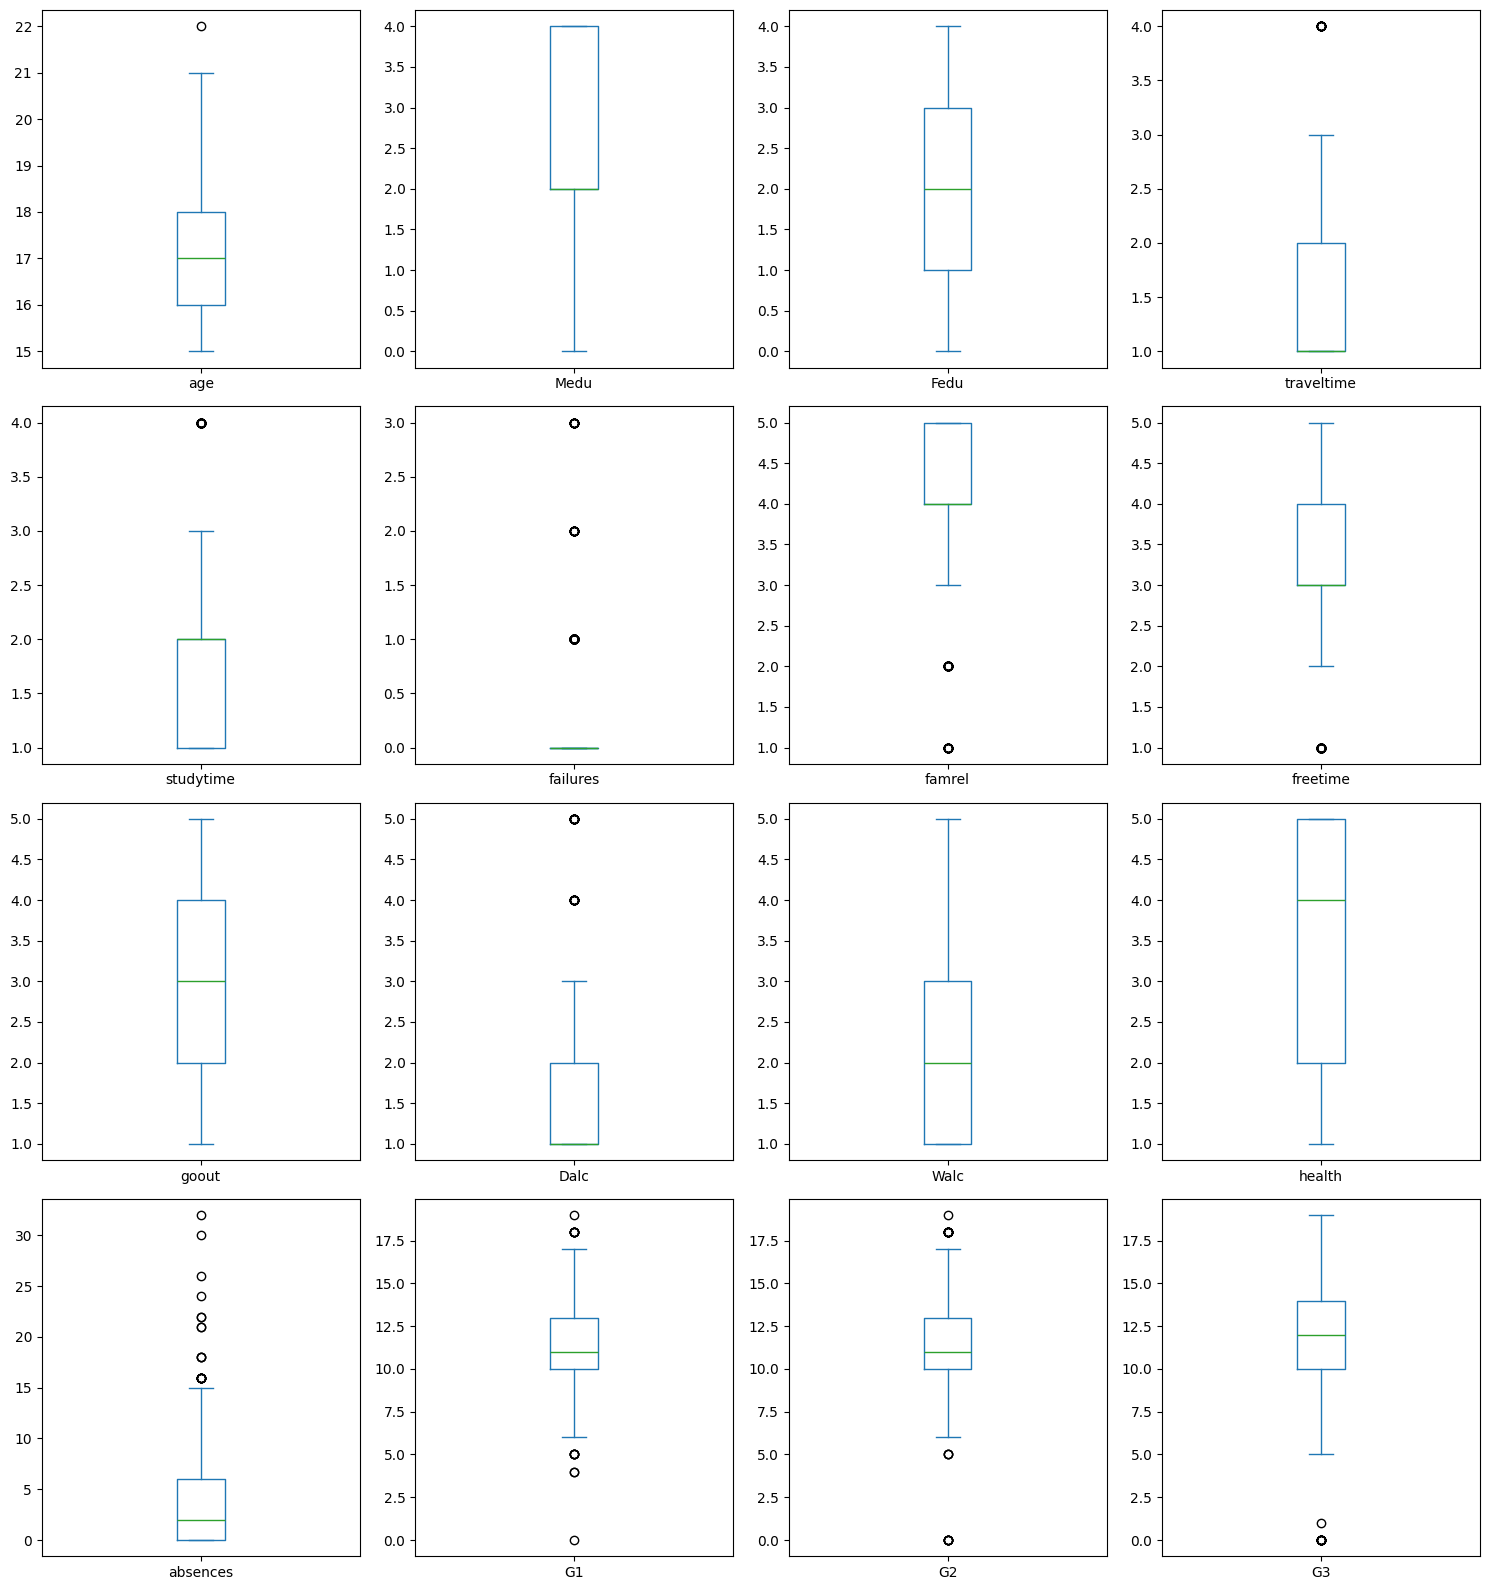

In [ ]:
#Melihat data outlier dengan visualisasi boxplot
num_cols = len(df.select_dtypes(include=['int64']).columns)
num_rows = (num_cols + 3) // 4  # Calculate rows needed, ensuring at least 1
df.plot(kind='box', subplots=True, layout=(num_rows, 4), figsize=(15, num_rows * 4))  # Adjust figsize for better visualization
plt.tight_layout()  # Add this line to prevent overlapping of subplots
plt.show()

## Exploratory Data Analysis - Univariate Analysis

Pada bagian ini kita akan melihat sebaran data pada seluruh variabel dan hubungan pada setiap variabel

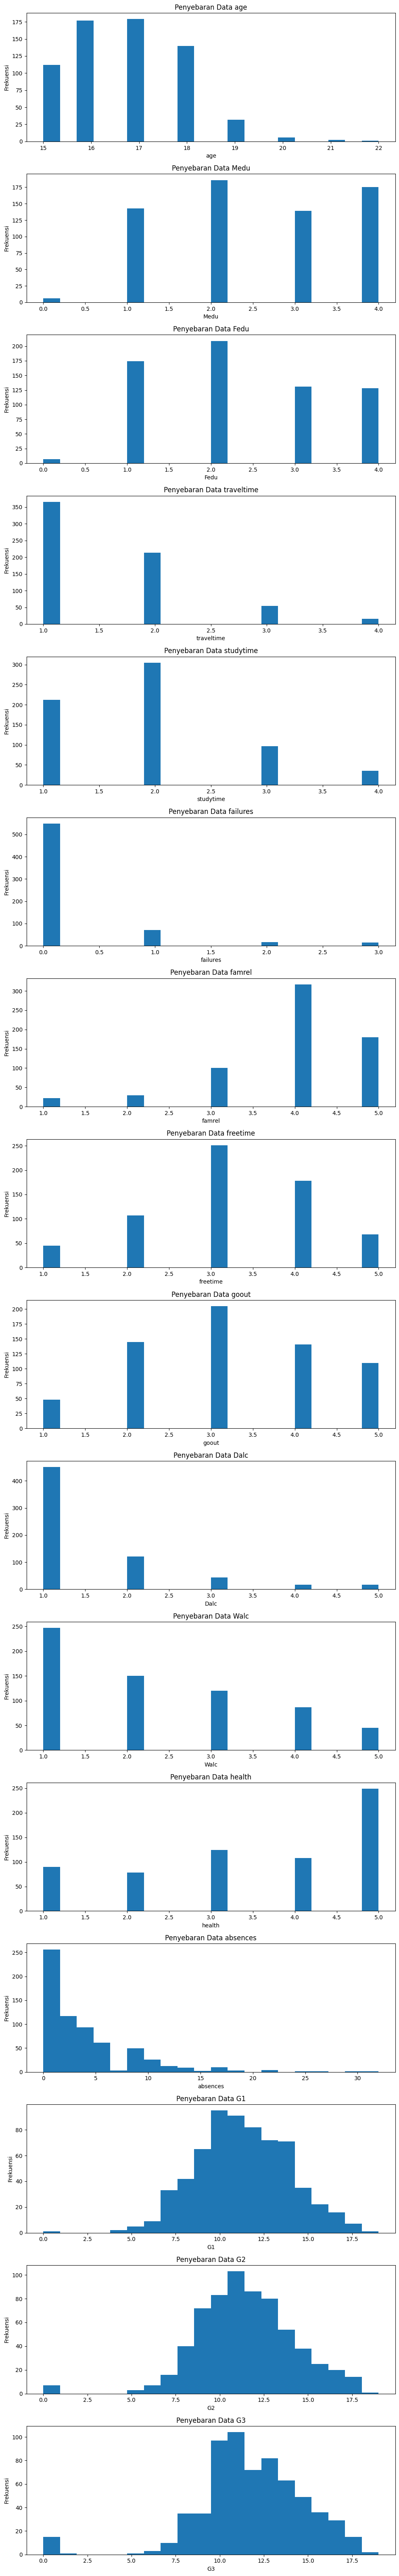

In [ ]:
# Ambil semua kolom numerik
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Buat histogram terpisah untuk setiap kolom
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, 4*len(numeric_cols)))

for i, col in enumerate(numeric_cols):
  axes[i].hist(df[col], bins=20) # Anda dapat menyesuaikan jumlah bins sesuai kebutuhan
  axes[i].set_title(f'Penyebaran Data {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

## Menganalisa data menggunakan Multivariate Analysis

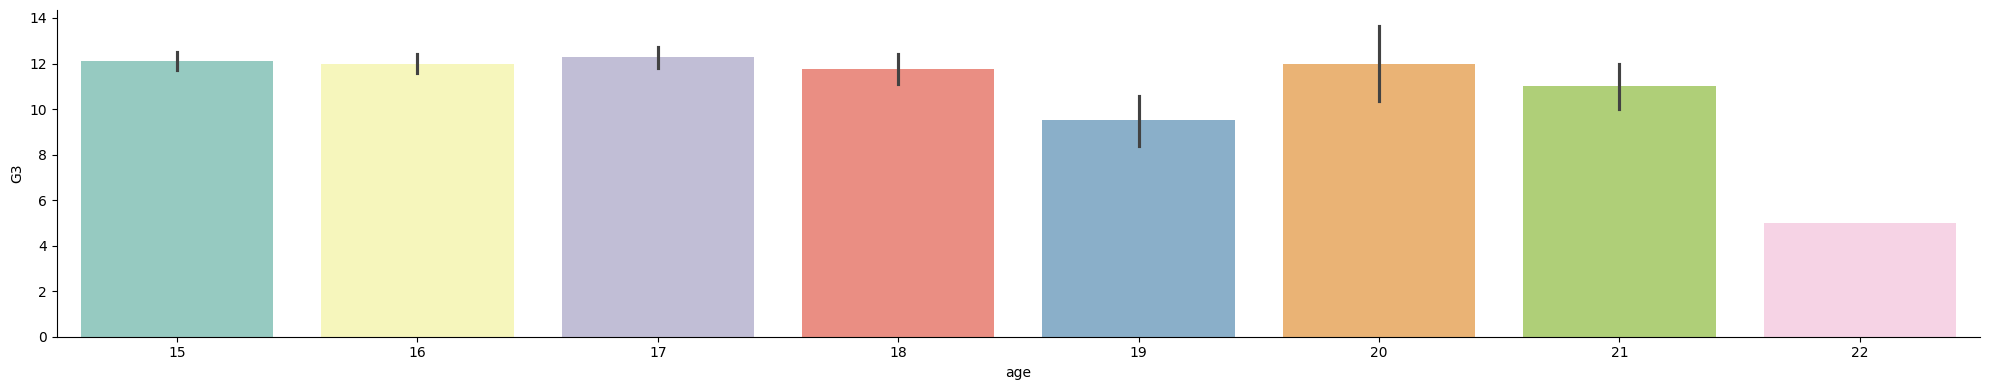

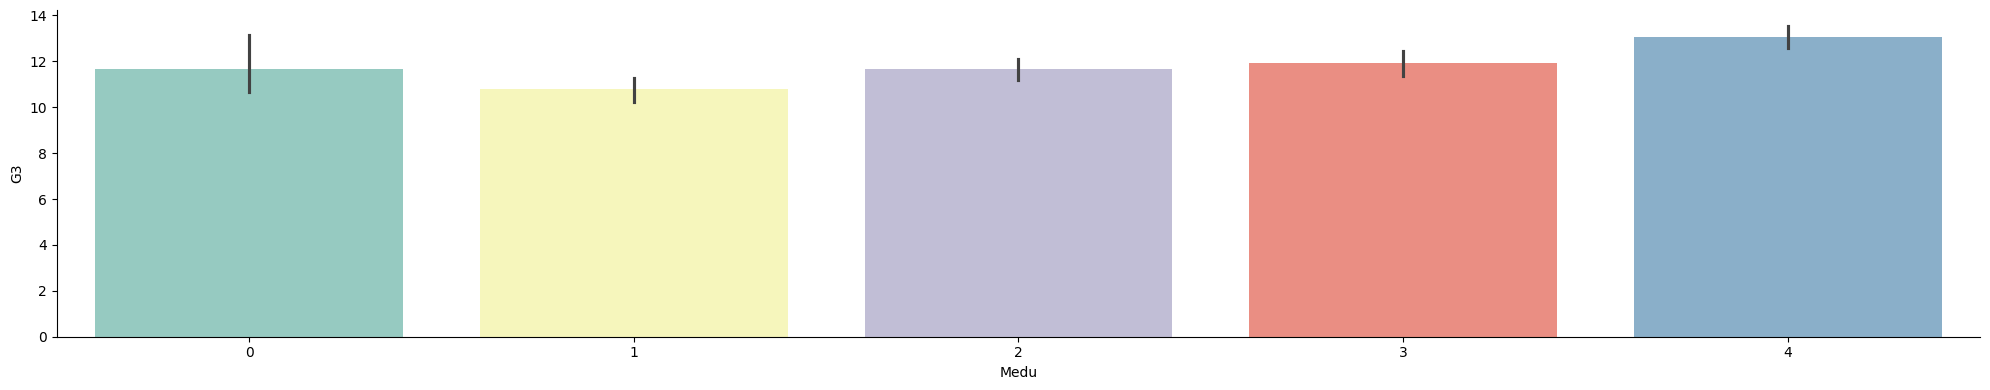

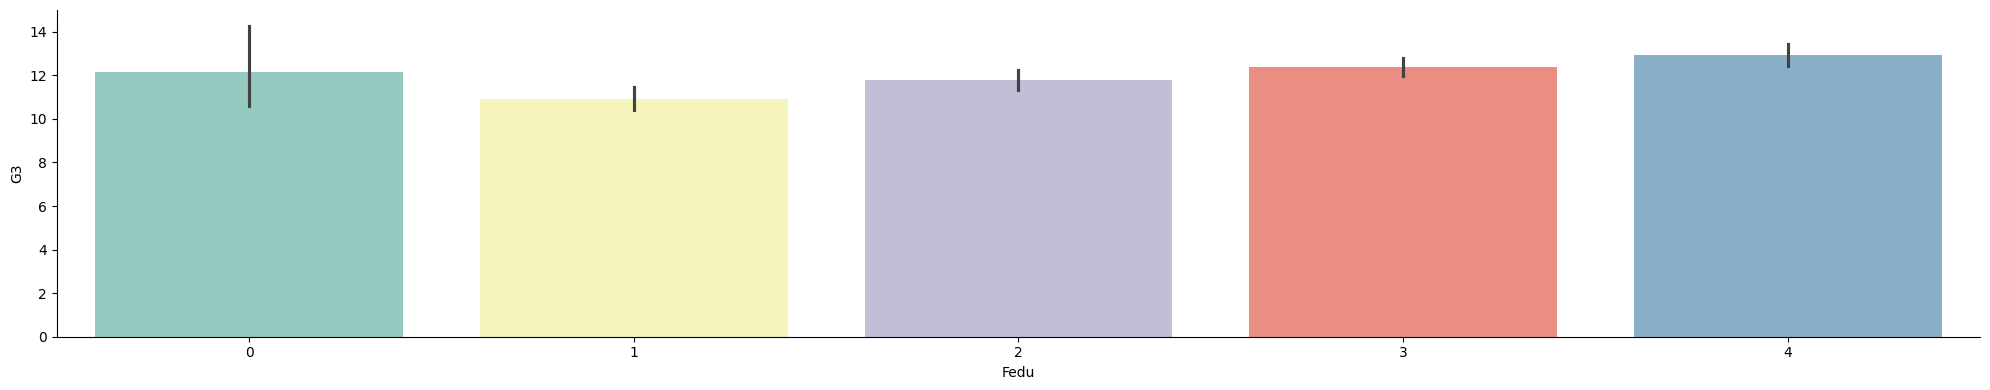

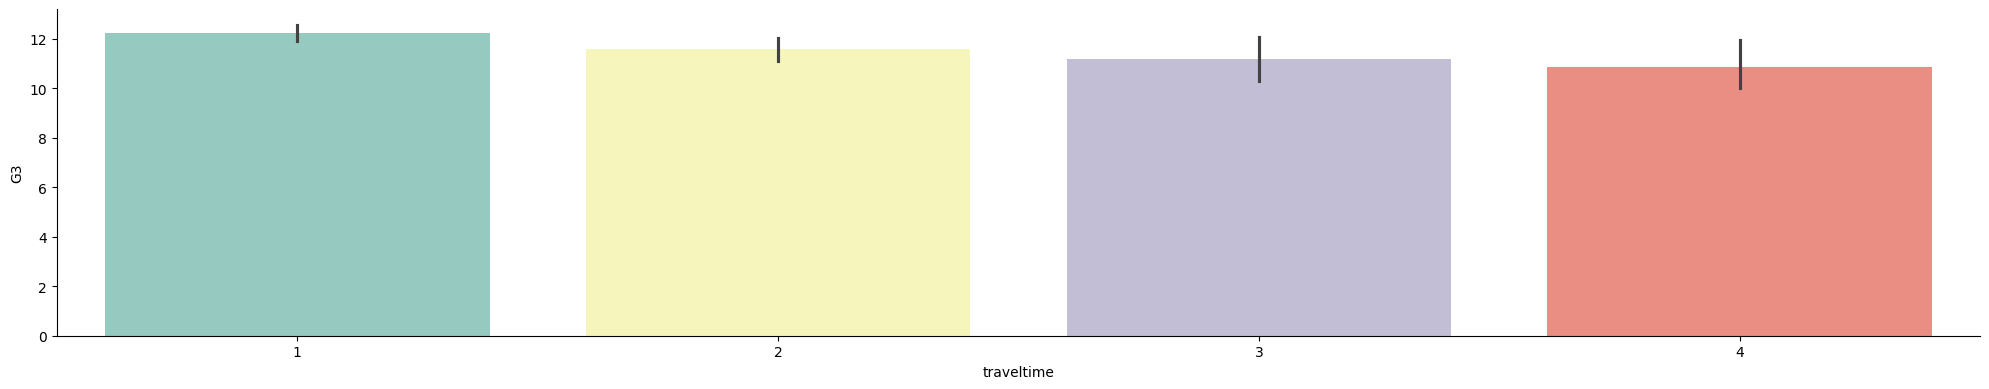

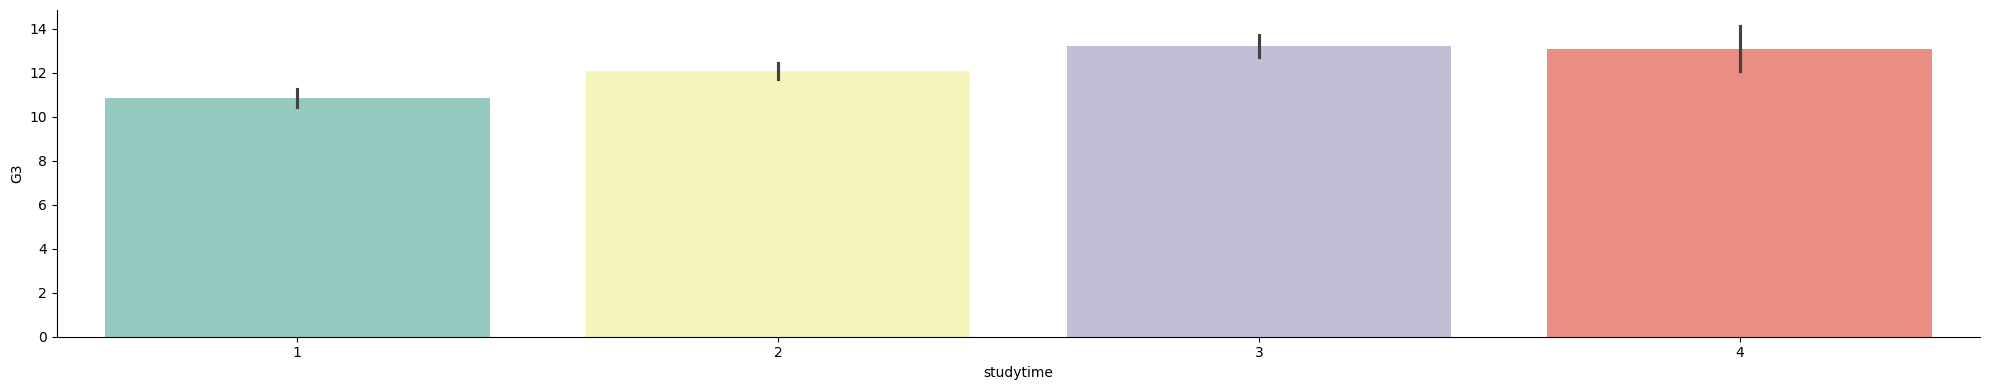

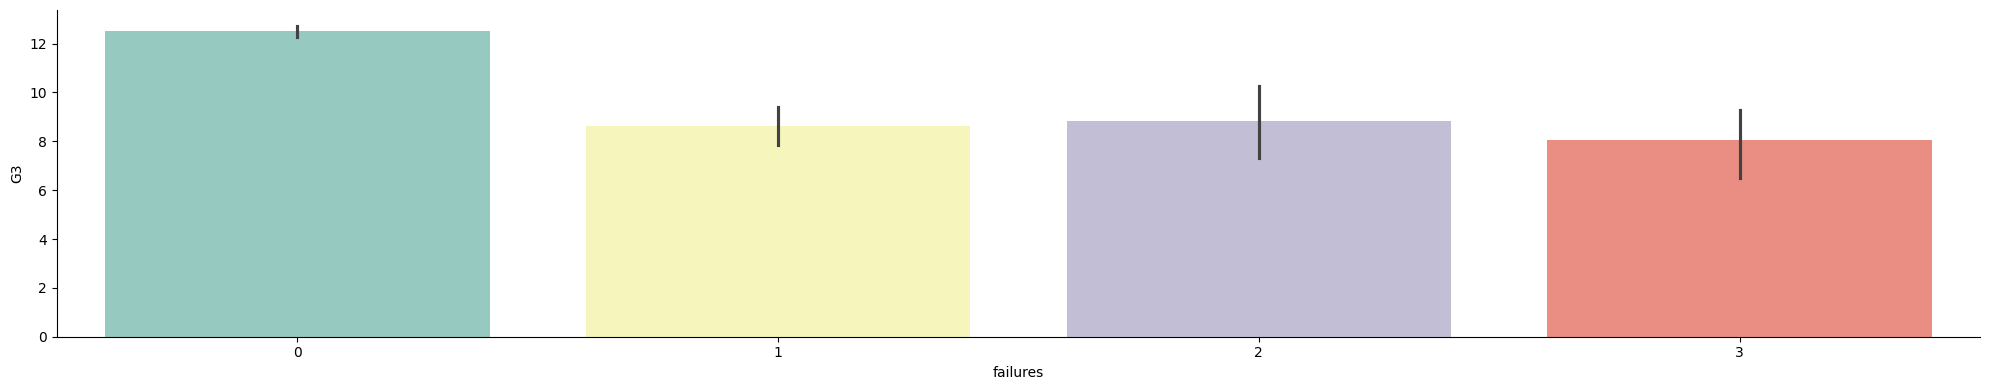

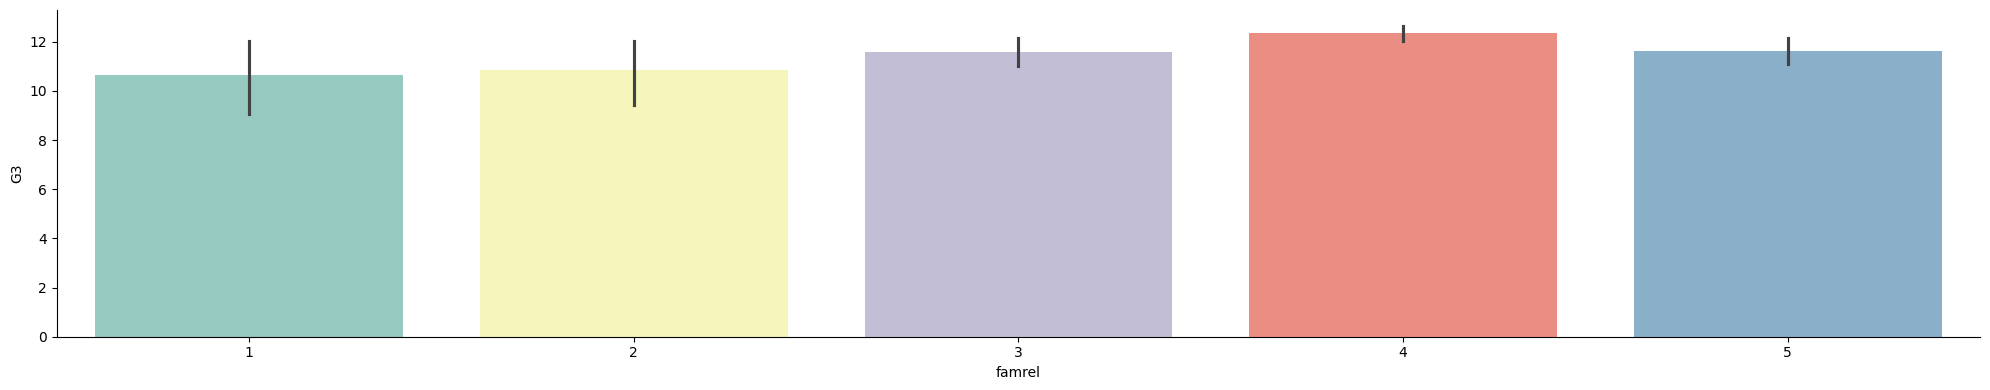

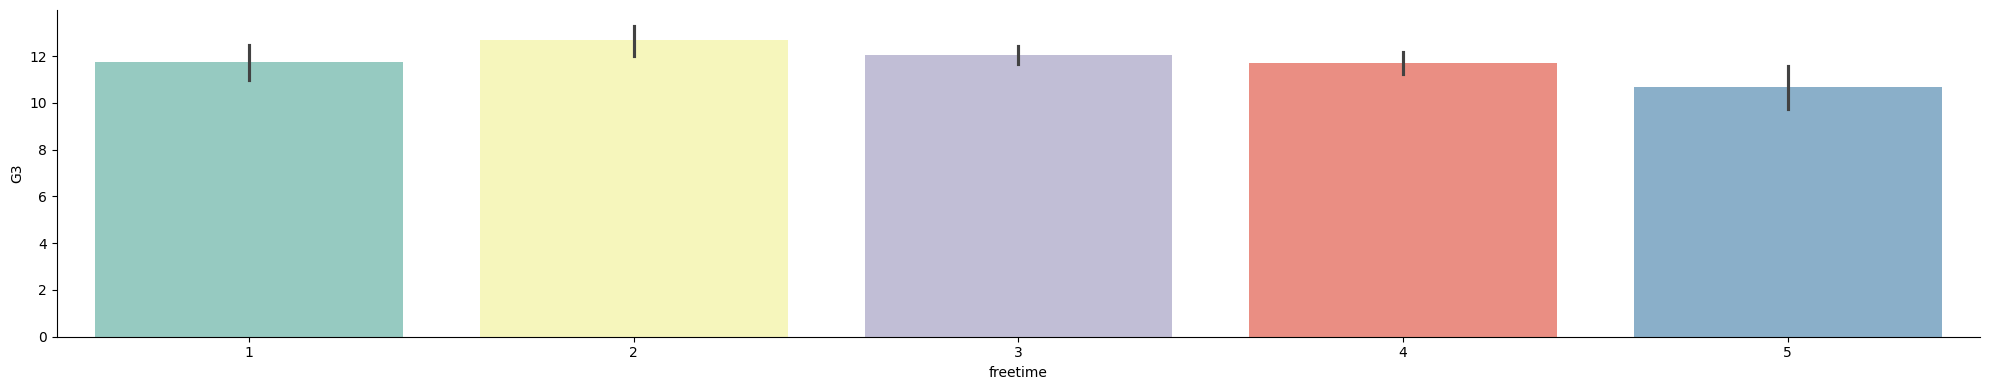

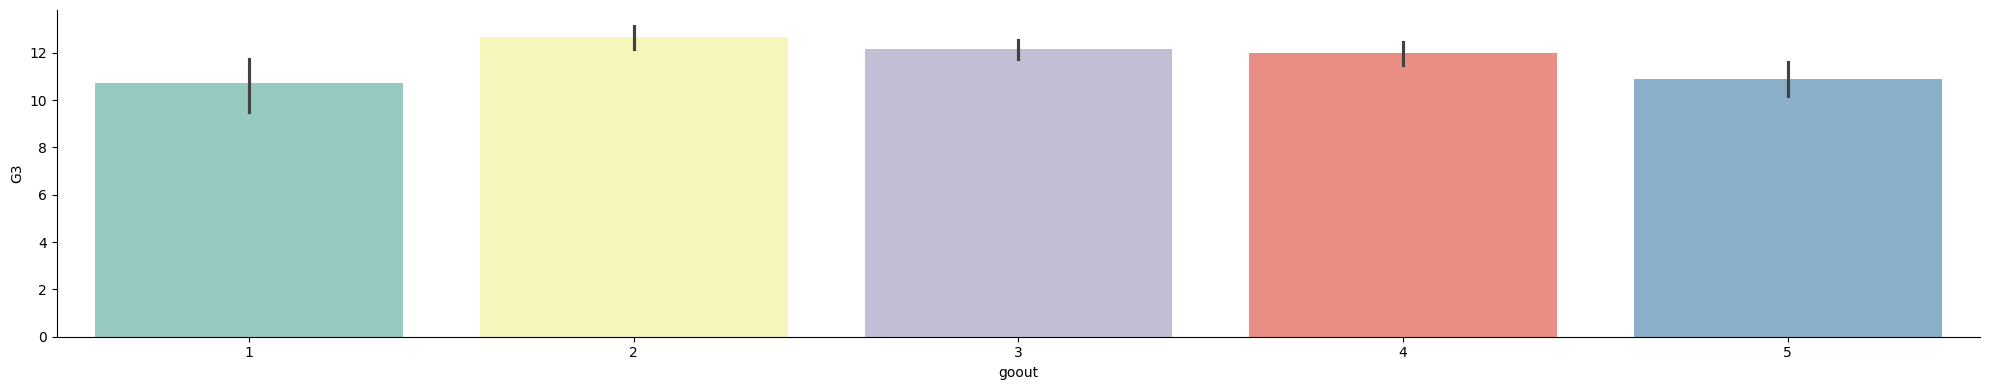

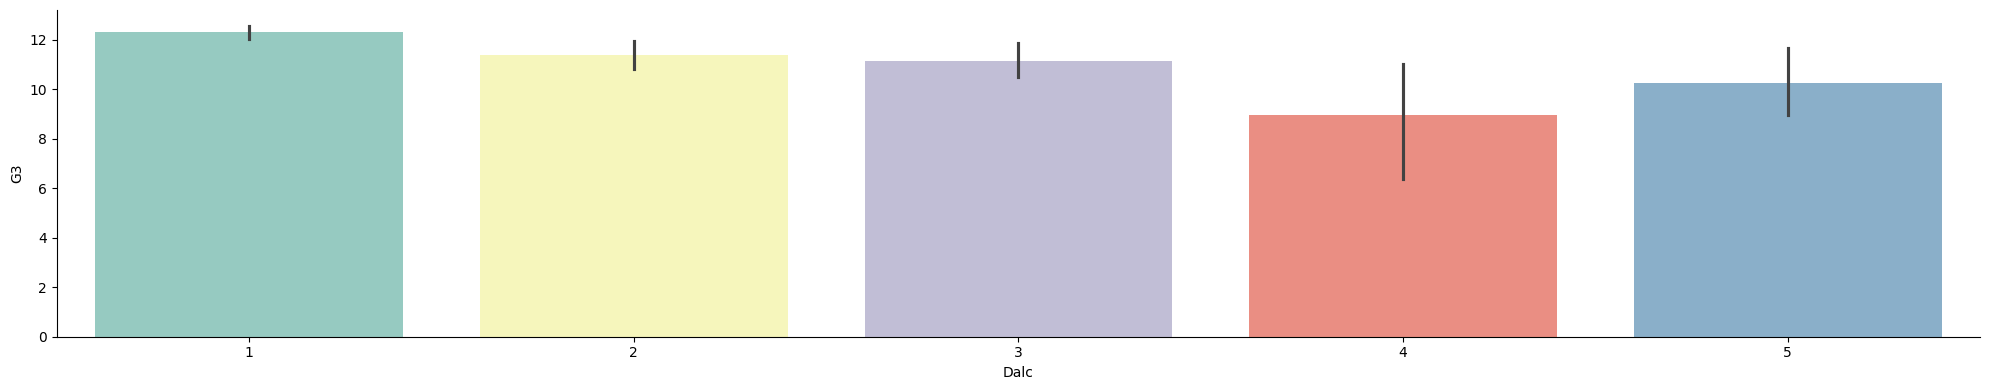

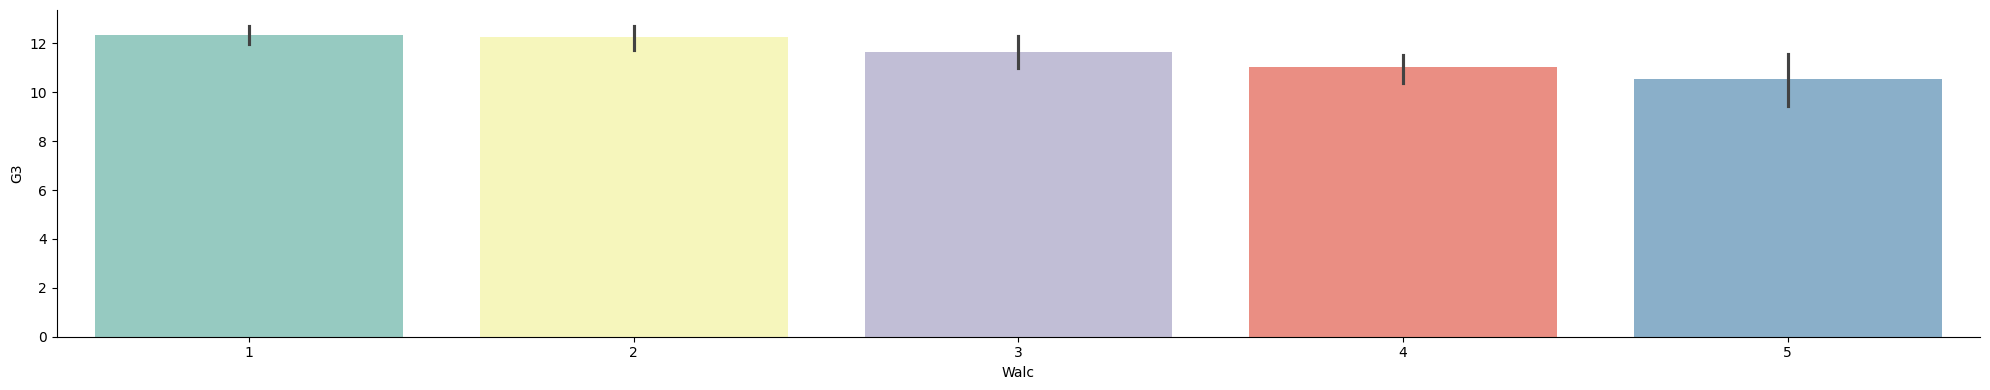

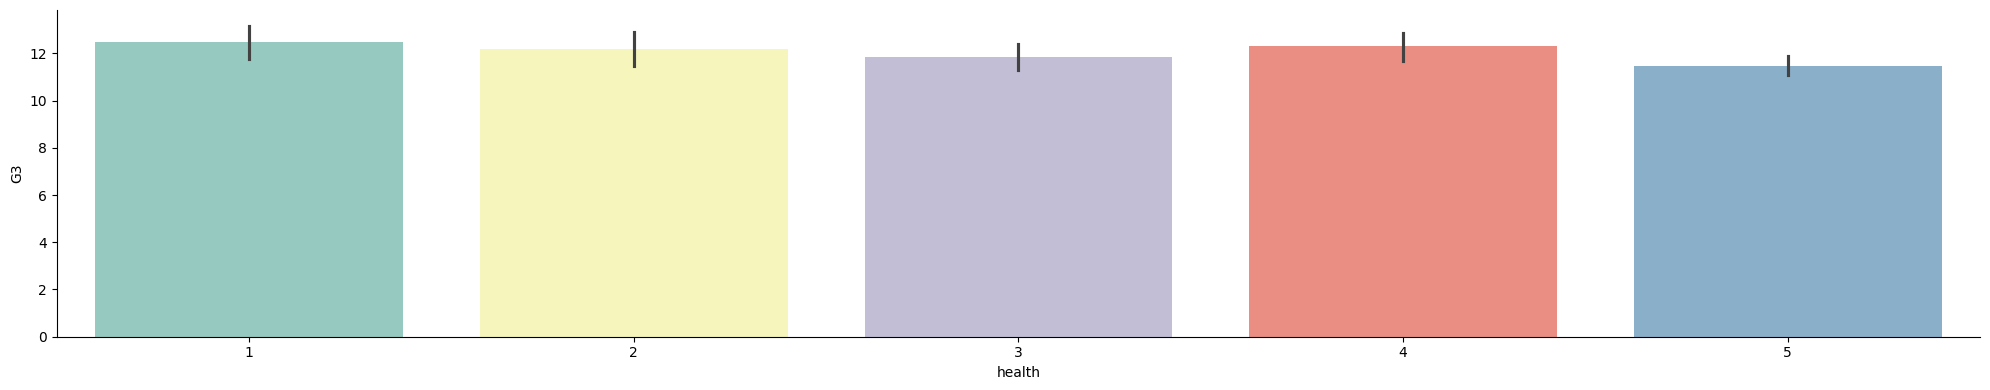

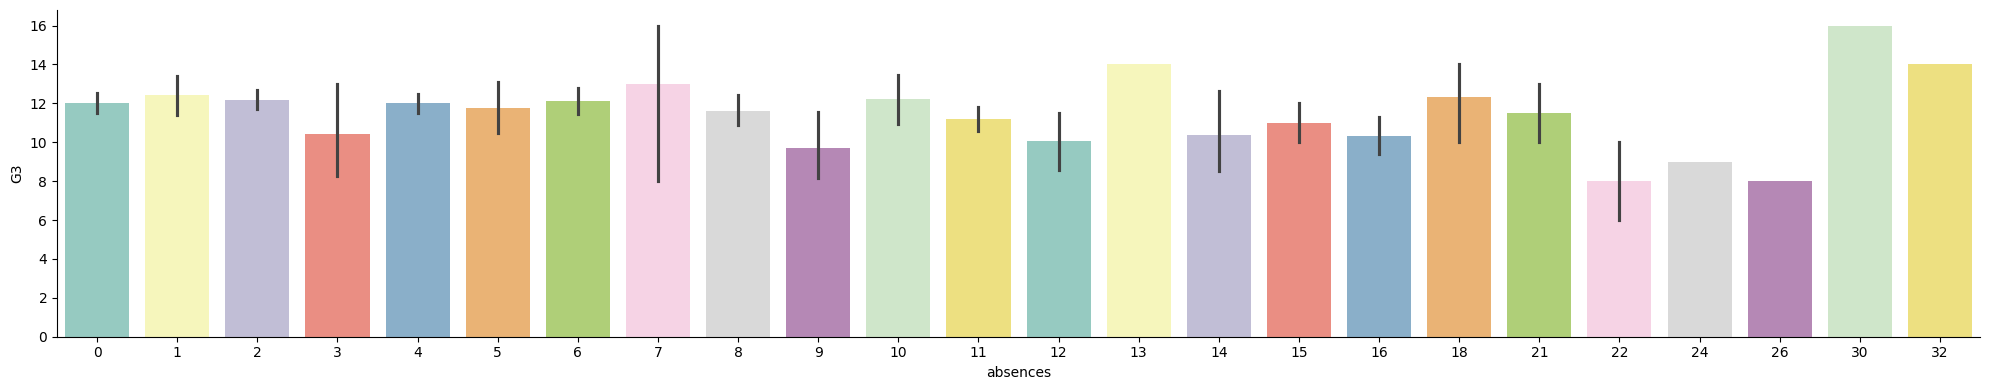

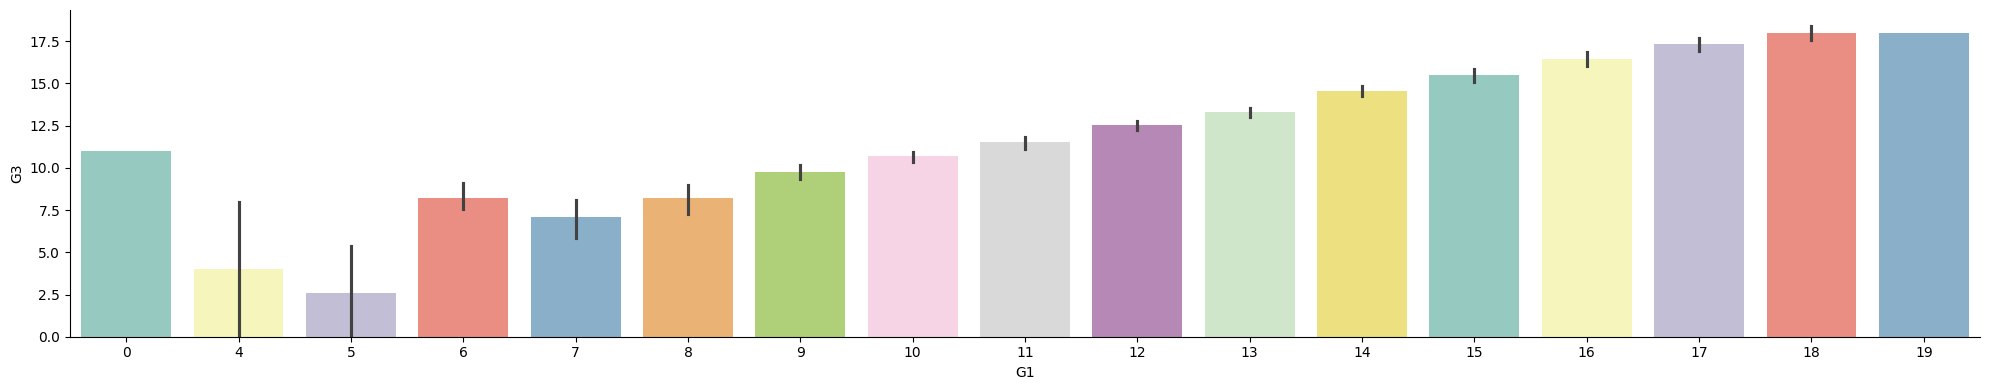

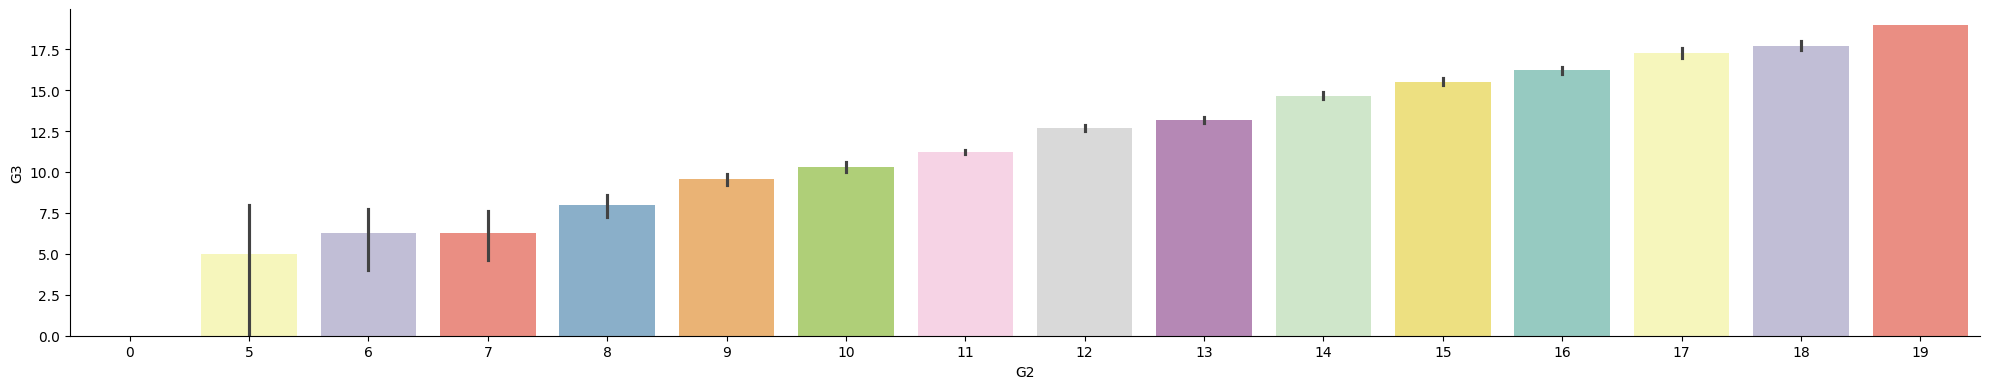

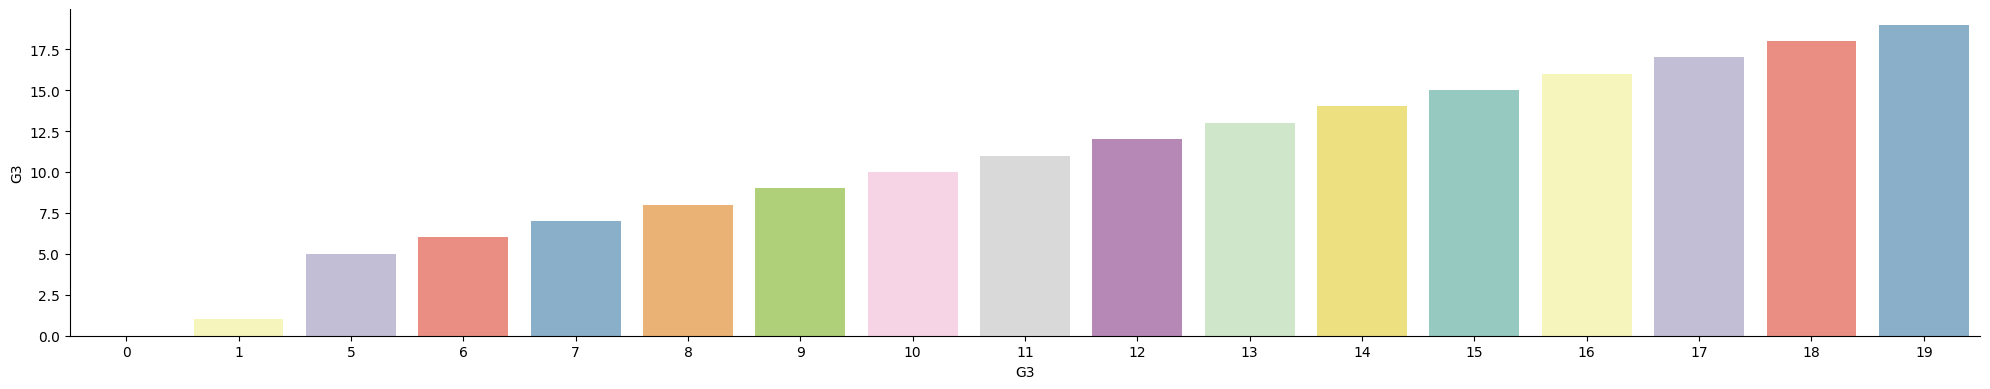

In [ ]:
# fitur numerik
category = df.select_dtypes(include='int64').columns.to_list()

for col in category:
  sns.catplot(x=col, y="G3", kind="bar", dodge=False, height = 4,
              aspect = 5, data=df, palette="Set3")

### Menampilkan Plot Pair fitur numerik

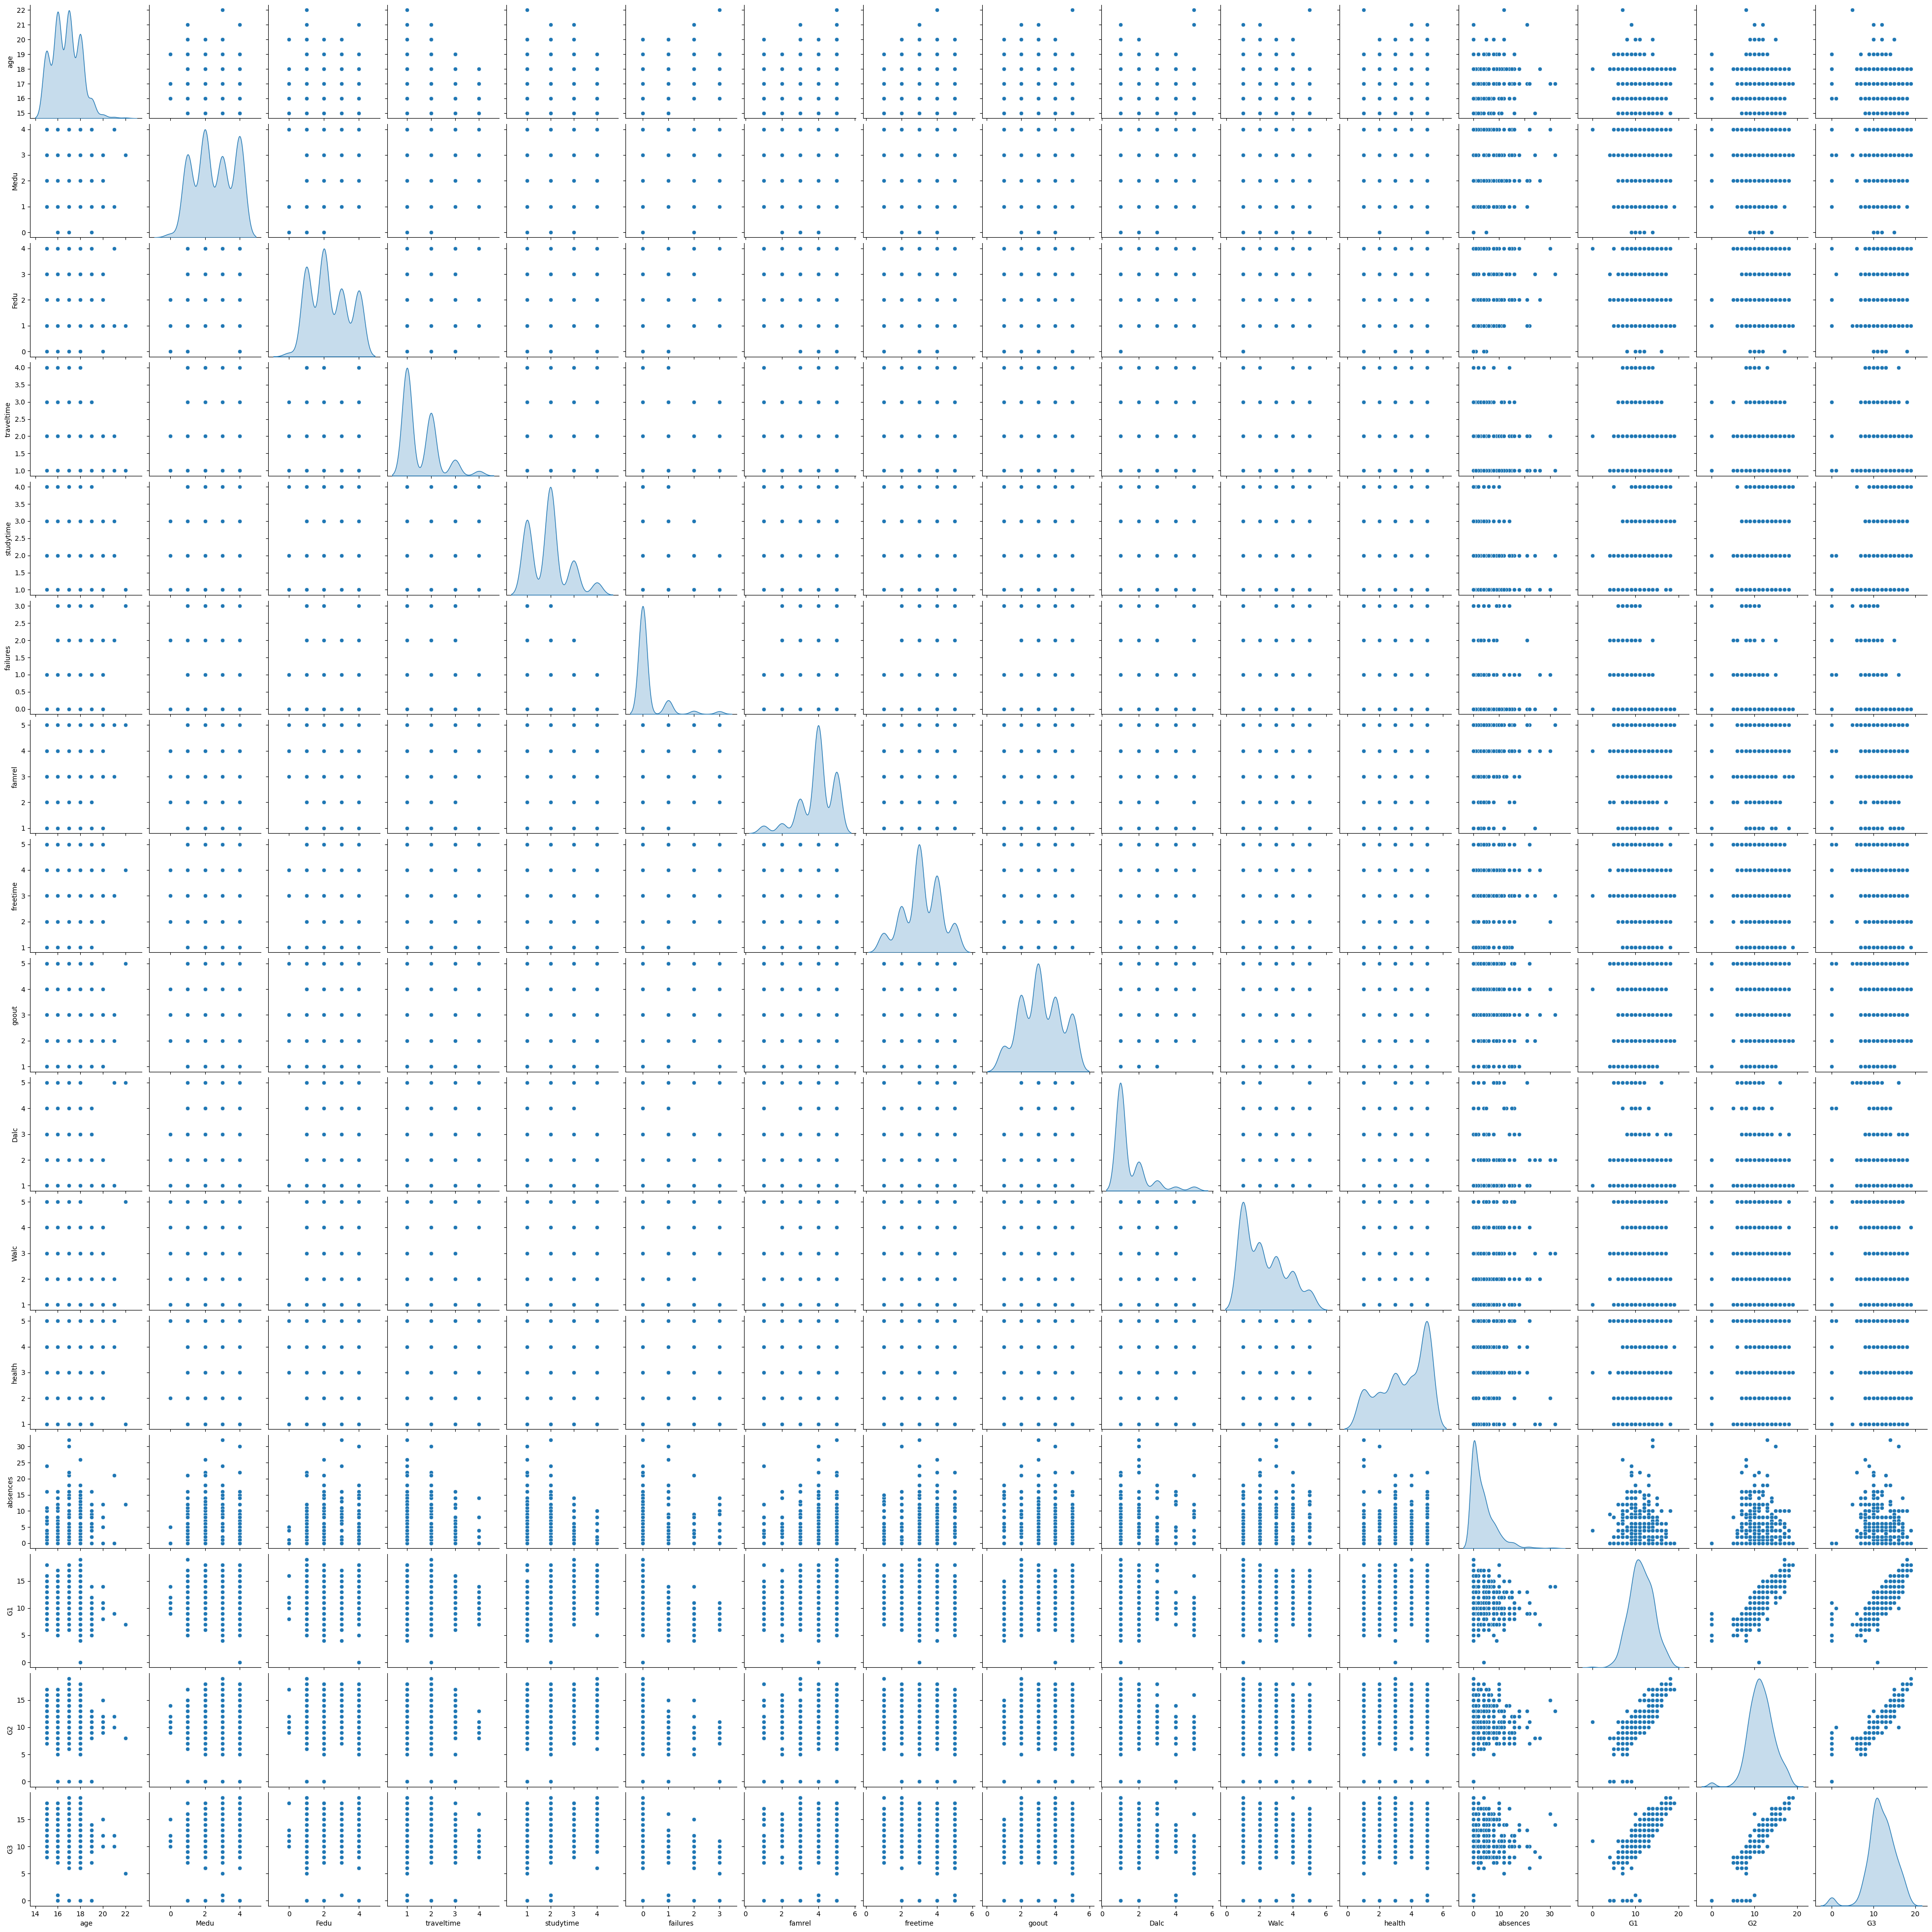

In [ ]:
sns.pairplot(df, diag_kind='kde')

### Melakukan pengamatan terhadap tingkat korelasi dengan menggunakan matrik korelasi pada tiap fitur

Text(0.5, 1.0, 'Matrik Korelasi fitur numerik')

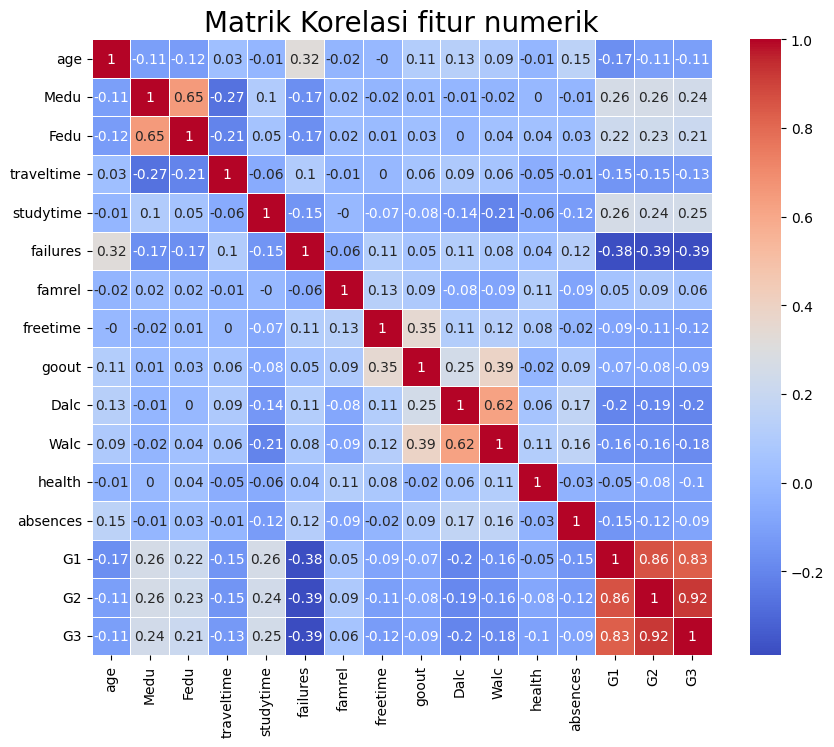

In [ ]:
# Memilih hanya kolom numerik
numeric_df = df.select_dtypes(include='number')

# Membuat heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title("Matrik Korelasi fitur numerik", size=20)

## DATA PREPARATION

### Menghapus Data dengan Nilai G3 Kurang dari 1

In [ ]:
df.drop(df[df['G3'] < 1].index, inplace = True)

### Mengonversi Variabel Kategorikal ke Bentuk One-Hot Encoding

In [ ]:
df_ohe = pd.get_dummies(df, drop_first=True)

Text(0.5, 1.0, 'Matrik Korelasi Nilai G3')

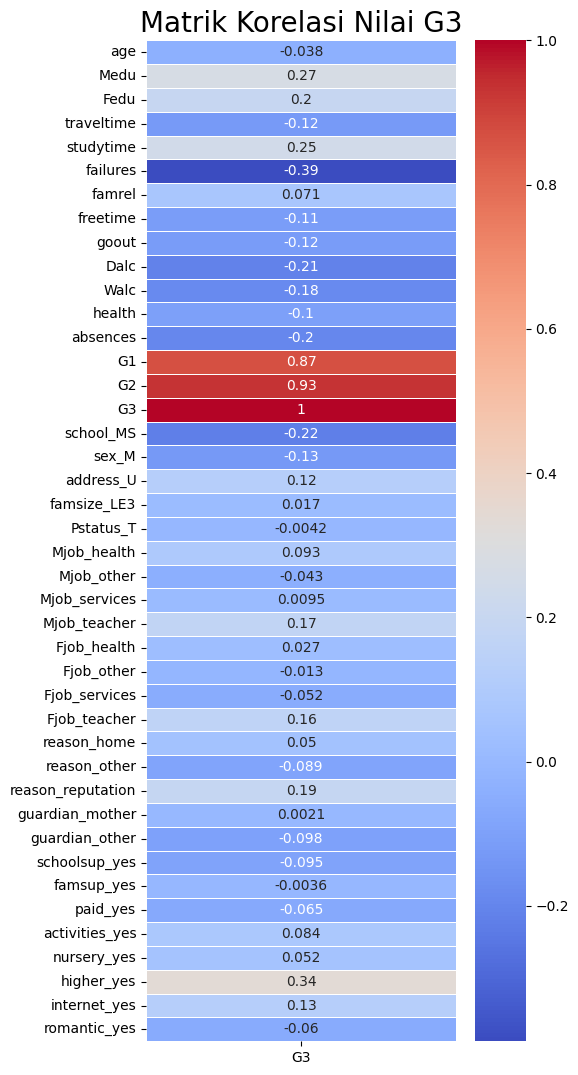

In [ ]:
# Calculate the correlation matrix for all columns
correlation_matrix = df_ohe.corr()

# Extract the correlation values for the 'G3' column
correlation_with_G3 = correlation_matrix['G3']

# Create a heatmap of the correlation values
plt.figure(figsize=(5, 13))
sns.heatmap(correlation_with_G3.to_frame(), annot=True, cmap='coolwarm', linewidth=0.5)
plt.title("Matrik Korelasi Nilai G3", size=20)

### Menghapus Fitur dengan Korelasi Rendah

In [1]:
# Menentukan Batas Minimum Korelasi (Threshold)
THRESHOLD = 0.13

In [ ]:
G3_corr = df_ohe.corr()["G3"]

In [ ]:
df_ohe_after_drop_features = df_ohe.copy()

In [ ]:
for key, value in G3_corr.items():
  if abs(value) < THRESHOLD:
    df_ohe_after_drop_features.drop(columns= key, inplace=True)

Text(0.5, 1.0, 'Matrik Korelasi Nilai G3')

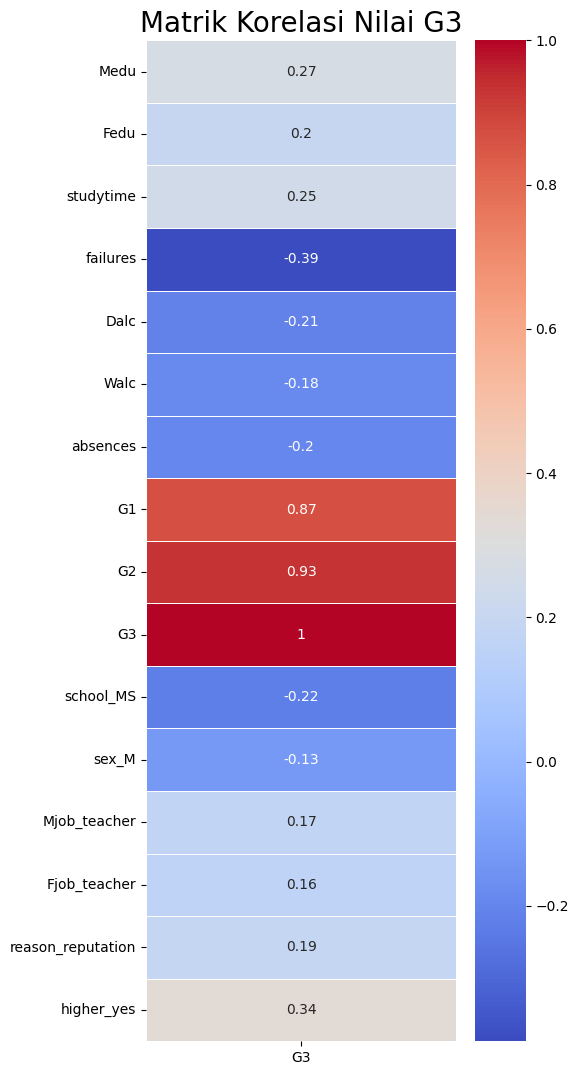

In [ ]:
# Calculate the correlation matrix for all columns
correlation_matrix = df_ohe_after_drop_features.corr()

# Extract the correlation values for the 'G3' column
correlation_with_G3 = correlation_matrix['G3']

# Create a heatmap of the correlation values
plt.figure(figsize=(5, 13))
sns.heatmap(correlation_with_G3.to_frame(), annot=True, cmap='coolwarm', linewidth=0.5)
plt.title("Matrik Korelasi Nilai G3", size=20)

### Membagi Dataset menjadi Fitur (X) dan Target (y)

In [ ]:
X = df_ohe_after_drop_features.drop('G3',axis = 1)
y = df_ohe_after_drop_features['G3']

In [ ]:
df_ohe_after_drop_features.head()

,Medu,Fedu,studytime,failures,Dalc,Walc,absences,G1,G2,G3,school_MS,sex_M,Mjob_teacher,Fjob_teacher,reason_reputation,higher_yes
0,4,4,2,0,1,1,4,0,11,11,False,False,False,True,False,True
1,1,1,2,0,1,1,2,9,11,11,False,False,False,False,False,True
2,1,1,2,0,2,3,6,12,13,12,False,False,False,False,False,True
3,4,2,3,0,1,1,0,14,14,14,False,False,False,False,False,True
4,3,3,2,0,1,2,0,11,13,13,False,False,False,False,False,True


### Membagi dataset menjadi train dan test

In [ ]:
# Dataset dibagi menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
print(f'Total of sample in whole dataset: {len(X)}')
print(f'Total of sample in train dataset: {len(X_train)}')
print(f'Total of sample in test dataset: {len(X_test)}')

Total of sample in whole dataset: 634
Total of sample in train dataset: 507
Total of sample in test dataset: 127


### Menerapkan teknik Standarisasi

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Menampilkan Hasil standarisasi dengan tabel
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled.head()

,Medu,Fedu,studytime,failures,Dalc,Walc,absences,G1,G2,school_MS,sex_M,Mjob_teacher,Fjob_teacher,reason_reputation,higher_yes
0,-1.302795,-1.204943,-1.141341,1.481391,1.686303,1.362663,-0.822261,-1.306323,-1.060070,1.371380,1.170111,-0.338062,-0.222911,-0.541634,-3.092329
1,0.449240,-0.286287,0.059198,-0.346018,-0.557675,-0.207496,0.089464,-0.554984,0.493270,-0.729193,-0.854620,-0.338062,-0.222911,-0.541634,0.323381
2,0.449240,1.551025,0.059198,-0.346018,-0.557675,-0.992576,-0.822261,1.699035,1.658274,-0.729193,1.170111,-0.338062,-0.222911,-0.541634,0.323381
3,-0.426778,-1.204943,0.059198,-0.346018,-0.557675,-0.992576,0.089464,-0.554984,-1.060070,-0.729193,1.170111,-0.338062,-0.222911,1.846265,0.323381
4,-0.426778,-1.204943,1.259737,1.481391,-0.557675,-0.992576,-0.822261,-0.930653,-0.671735,-0.729193,1.170111,-0.338062,-0.222911,-0.541634,0.323381


### Mengubah variabel target menjadi kategori

In [ ]:
X = df_ohe_after_drop_features.drop('G3',axis = 1)
y = df_ohe_after_drop_features['G3'].apply(lambda x: 'pass' if x >= 10 else 'fail')

## MODEL DEVELOPMENT

In [ ]:
def train_binary_classification_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

    model1 = LogisticRegression(max_iter=200)
    model2 = DecisionTreeClassifier()
    model3 = KNeighborsClassifier()
    model4 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=123, n_jobs=-1, class_weight='balanced')

    models = [model1, model2, model3, model4]
    model_name_list = ['LogisticRegression', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'RandomForestClassifier']

    # Dataframe for results
    results = pd.DataFrame(columns=["Test Accuracy", "Train Accuracy"], index=model_name_list)

    # Set up subplots
    fig, axes = plt.subplots(1, len(models), figsize=(20, 4))
    fig.suptitle("Confusion Matrices for Each Model")

    for i, model in enumerate(models):
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_test_pred)
        accuracy_train = accuracy_score(y_train, y_train_pred)

        model_name = model_name_list[i]
        results.loc[model_name, :] = [accuracy, accuracy_train]

        # Display Confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
        axes[i].set_title(f"{model_name}")
        axes[i].set_xlabel("Predicted")
        axes[i].set_ylabel("Actual")

        # Print Classification Report
        print(f"\nClassification Report for {model_name}:\n")
        print(classification_report(y_test, y_test_pred))

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    return results

## EVALUASI MODEL

* Tidak hanya menampilkan hasil evaluasi melainkan membahas insightnya
* **Secara teknis** kamu berhasil mengevaluasi model berdasarkan **metrik evaluasi**, namun dalam laporan ini kamu harus **menjabarkan** dampak dari model yang kamu evaluasi terhadap **Business Understanding**.
 * Apakah sudah menjawab problem statment?
 * Apakah berhasil mencapai goals yang diharapkan?
 * Apakah solusi statement yang kamu rencanakan berdampak? Jelaskan!


Classification Report for LogisticRegression:

              precision    recall  f1-score   support

        fail       0.86      0.55      0.67        22
        pass       0.91      0.98      0.94       105

    accuracy                           0.91       127
   macro avg       0.88      0.76      0.81       127
weighted avg       0.90      0.91      0.90       127


Classification Report for DecisionTreeClassifier:

              precision    recall  f1-score   support

        fail       0.65      0.59      0.62        22
        pass       0.92      0.93      0.92       105

    accuracy                           0.87       127
   macro avg       0.78      0.76      0.77       127
weighted avg       0.87      0.87      0.87       127


Classification Report for KNeighborsClassifier:

              precision    recall  f1-score   support

        fail       0.82      0.41      0.55        22
        pass       0.89      0.98      0.93       105

    accuracy                    

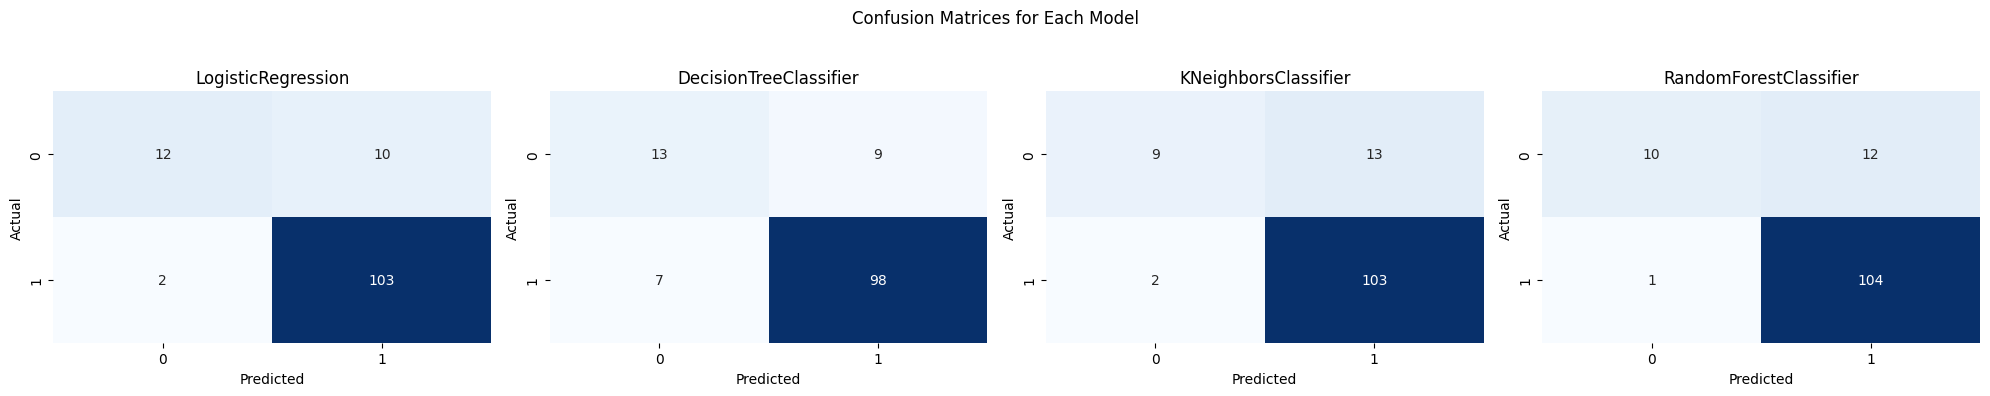

,Test Accuracy,Train Accuracy
LogisticRegression,0.905512,0.944773
DecisionTreeClassifier,0.874016,1.0
KNeighborsClassifier,0.88189,0.944773
RandomForestClassifier,0.897638,1.0


In [ ]:
train_binary_classification_model(X,y)

In [ ]:
X_all_features_except_G3 = df_ohe.drop('G3',axis = 1)
y_G3 = df_ohe ['G3'].apply(lambda x: 'pass' if x >= 10 else 'fail')


Classification Report for LogisticRegression:

              precision    recall  f1-score   support

        fail       0.83      0.45      0.59        22
        pass       0.90      0.98      0.94       105

    accuracy                           0.89       127
   macro avg       0.86      0.72      0.76       127
weighted avg       0.88      0.89      0.88       127


Classification Report for DecisionTreeClassifier:

              precision    recall  f1-score   support

        fail       0.64      0.64      0.64        22
        pass       0.92      0.92      0.92       105

    accuracy                           0.87       127
   macro avg       0.78      0.78      0.78       127
weighted avg       0.87      0.87      0.87       127


Classification Report for KNeighborsClassifier:

              precision    recall  f1-score   support

        fail       0.82      0.41      0.55        22
        pass       0.89      0.98      0.93       105

    accuracy                    

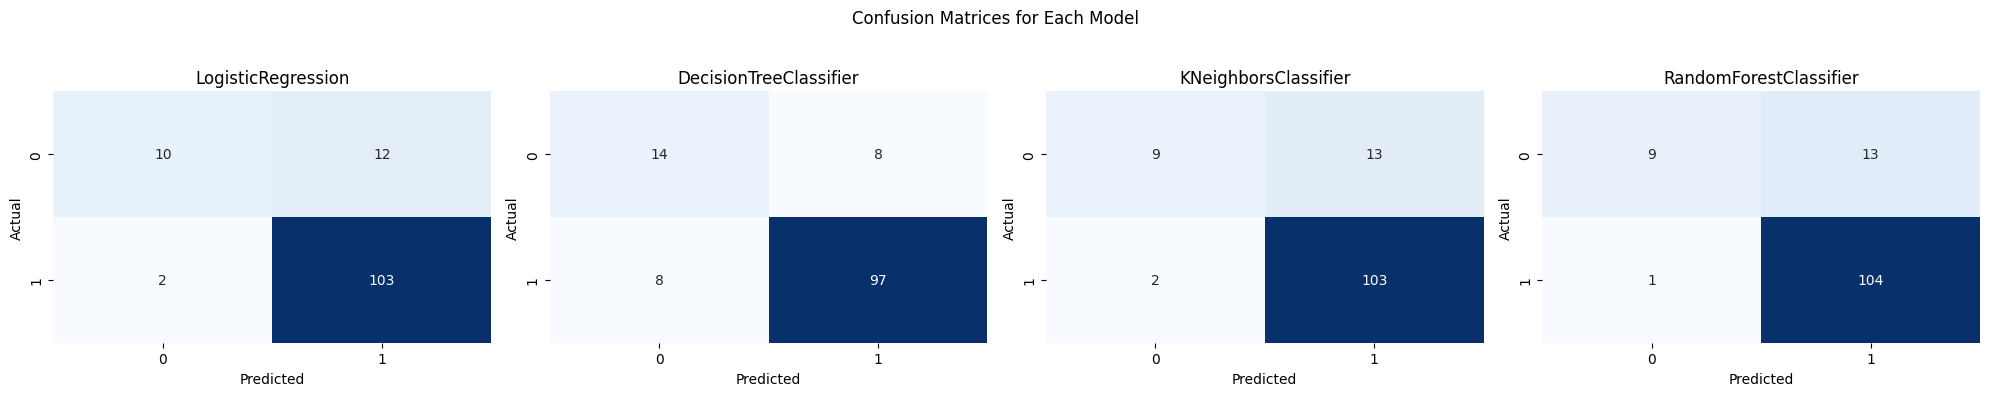

,Test Accuracy,Train Accuracy
LogisticRegression,0.889764,0.966469
DecisionTreeClassifier,0.874016,1.0
KNeighborsClassifier,0.88189,0.928994
RandomForestClassifier,0.889764,1.0


In [ ]:
train_binary_classification_model(X_all_features_except_G3, y_G3)

## Kesimpulan



* Logistic Regression dan K-Nearest Neighbors lebih baik dalam hal generalisasi, karena perbedaan antara akurasi data uji dan data latih lebih kecil, sehingga kedua model ini dapat dipilih jika stabilitas dan generalisasi lebih penting.
* Decision Tree dan Random Forest menunjukkan tanda-tanda overfitting yang lebih jelas, terutama karena akurasi pada data latih mencapai 100%. Namun, peningkatan pada Decision Tree di Data 2 menunjukkan bahwa kinerjanya lebih baik dibandingkan Data 1.
* Secara keseluruhan, Random Forest memberikan akurasi uji yang paling konsisten (91.34%) pada kedua dataset, menjadikannya kandidat yang baik jika akurasi yang lebih tinggi di data uji diinginkan, meskipun ada risiko overfitting.




## Kriteria Saran

Kamu melampirkan sitasi pada bebrapa kalimat yang merujuk dari referensi, namun kamu tidak melampirkan daftar referensi dari setiap sitasi yang dilampirkan